# Machine Learning - Clustering and Dimensionality Reduction
## Assignment 3
### Rhichard Koh

## Flatten the data in 4070 columns (each corresponding to a stock-code), and 4373 rows (each corresponding to a customer id). Your numbers may differ depending on the way you do flattening.

In [38]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
# Checking Unique Items
len(df["StockCode"].unique())

4070

In [5]:
# Pivoting the CustomerID and StockCode with the calues as the Quantity
pivot_df = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)
pivot_df

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Checking which item is bought the most.
pivot_df.max().sort_values()

StockCode
21412         0
79320         0
85023C        0
35832         0
85098B        0
          ...  
21915      8120
17003     10077
84077     10080
22197     11692
84826     12540
Length: 3684, dtype: int64

In [7]:
# Converting the columns to be all string.
pivot_df.columns = pivot_df.columns.astype(str)

In [8]:
# Checking if the conversion happened.
pivot_df.columns[1]

'10080'

In [9]:
# Scaling the Quantity Values.
scaler = StandardScaler()
scaled = scaler.fit_transform(pivot_df)

In [10]:
scaled

array([[-0.04089274, -0.04348365, -0.04752299, ..., -0.00995053,
        -0.03026138, -0.15831688],
       [-0.04089274, -0.04348365, -0.04752299, ..., -0.00995053,
        -0.03026138, -0.15831688],
       [-0.04089274, -0.04348365, -0.04752299, ..., -0.00995053,
        -0.03026138,  1.91678387],
       ...,
       [-0.04089274, -0.04348365, -0.04752299, ..., -0.00995053,
        -0.03026138, -0.15831688],
       [-0.04089274, -0.04348365, -0.04752299, ...,  0.01737593,
        -0.03026138, -0.15831688],
       [-0.04089274, -0.04348365, -0.04752299, ..., -0.00995053,
        -0.03026138, -0.15831688]])

## Apply PCA and pick top 3 PCs to transform your 4070x4373 matrix into 3x4373 one.

In [11]:
# Applying PCA so we are only left with 3 columns.
pca = PCA(n_components=3)
scaled_pca = pca.fit_transform(scaled)

In [12]:
scaled_pca

array([[-2.40439108, -1.35824465, -1.12467836],
       [ 4.53401998,  4.77331158,  5.52102463],
       [ 0.43233602, -0.89957571, -0.58101546],
       ...,
       [-2.09091299, -0.80098264, -0.41156032],
       [ 0.59991994, -1.23800721, -0.47412906],
       [ 1.99955835,  7.31157919, -1.31877326]])

In [13]:
# Converting the scaled data into a dataframe for easier use.
scaled_df = pd.DataFrame(data=scaled, columns=pivot_df.columns, index=pivot_df.index)
scaled_df

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,-0.040893,-0.043484,-0.047523,-0.038833,-0.102894,-0.076524,-0.051014,-0.032103,-0.047351,-0.077025,...,-0.018645,-0.015125,-0.045418,-0.023847,0.015125,0.023437,-0.015125,-0.009951,-0.030261,-0.158317
12347.0,-0.040893,-0.043484,-0.047523,-0.038833,-0.102894,-0.076524,-0.051014,-0.032103,-0.047351,-0.077025,...,-0.018645,-0.015125,-0.045418,-0.023847,0.015125,0.023437,-0.015125,-0.009951,-0.030261,-0.158317
12348.0,-0.040893,-0.043484,-0.047523,-0.038833,-0.102894,-0.076524,-0.051014,-0.032103,-0.047351,-0.077025,...,-0.018645,-0.015125,-0.045418,-0.023847,0.015125,0.023437,-0.015125,-0.009951,-0.030261,1.916784
12349.0,-0.040893,-0.043484,-0.047523,-0.038833,-0.102894,-0.076524,-0.051014,-0.032103,-0.047351,-0.077025,...,-0.018645,-0.015125,-0.045418,-0.023847,0.015125,0.023437,-0.015125,-0.009951,-0.030261,0.072250
12350.0,-0.040893,-0.043484,-0.047523,-0.038833,-0.102894,-0.076524,-0.051014,-0.032103,-0.047351,-0.077025,...,-0.018645,-0.015125,-0.045418,-0.023847,0.015125,0.023437,-0.015125,-0.009951,-0.030261,0.072250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,-0.040893,-0.043484,-0.047523,-0.038833,-0.102894,-0.076524,-0.051014,-0.032103,-0.047351,-0.077025,...,-0.018645,-0.015125,-0.045418,-0.023847,0.015125,0.023437,-0.015125,-0.009951,-0.030261,-0.158317
18281.0,-0.040893,-0.043484,-0.047523,-0.038833,-0.102894,-0.076524,-0.051014,-0.032103,-0.047351,-0.077025,...,-0.018645,-0.015125,-0.045418,-0.023847,0.015125,0.023437,-0.015125,-0.009951,-0.030261,-0.158317
18282.0,-0.040893,-0.043484,-0.047523,-0.038833,-0.102894,-0.076524,-0.051014,-0.032103,-0.047351,-0.077025,...,-0.018645,-0.015125,-0.045418,-0.023847,0.015125,0.023437,-0.015125,-0.009951,-0.030261,-0.158317


In [14]:
# Converting the scaled and PCA transformed data into a dataframe for easier use.
scaled_pca_df = pd.DataFrame(data=scaled_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'], index=pivot_df.index)
scaled_pca_df

,Principal Component 1,Principal Component 2,Principal Component 3
CustomerID,,,
12346.0,-2.404391,-1.358245,-1.124678
12347.0,4.534020,4.773312,5.521025
12348.0,0.432336,-0.899576,-0.581015
12349.0,-0.266184,-0.597366,0.383031
12350.0,-1.918710,-0.589165,-0.547577
...,...,...,...
18280.0,-2.315659,-1.261694,-0.943462
18281.0,-2.089671,-1.432836,-1.041452
18282.0,-2.090913,-0.800983,-0.411560


In [46]:
# Viewing a 3D visual of the scaled and PCA transformed data.
import plotly.express as px
fig = px.scatter_3d(scaled_pca_df, x='Principal Component 1', y='Principal Component 2', z='Principal Component 3', title='Scaled PCA DataFrame')
fig.show()

## Get cluster labels from each algorithm.

### K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

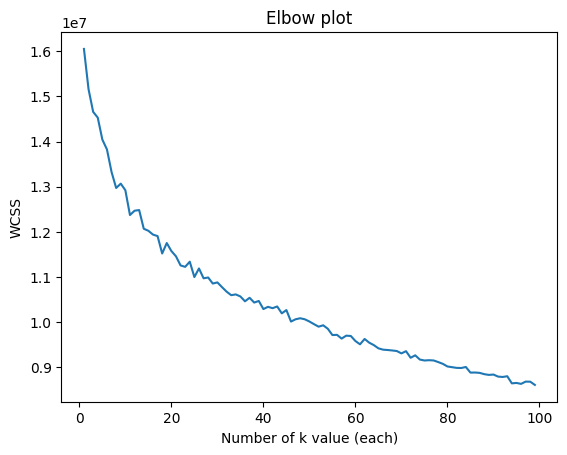

In [16]:
# Finding the optimal number of clusters for K-Means.
wcss = []

for each in range(1, 100):
    kmeans = KMeans(n_clusters=each)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 100), wcss)
plt.title('Elbow plot')
plt.xlabel("Number of k value (each)")
plt.ylabel("WCSS")
plt.show()

In [17]:
# Initializing the cluster size to be 4 for K-Means.
kmeans1 = KMeans(n_clusters=4)
cluster_k = kmeans1.fit_predict(scaled_pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [18]:
# Creating a DataFrame for the prediction of K-Means.
with_km_df = pd.DataFrame(scaled_pca_df, columns=scaled_pca_df.columns, index=scaled_pca_df.index)
with_km_df['cluster'] = cluster_k
with_km_df.head()

,Principal Component 1,Principal Component 2,Principal Component 3,cluster
CustomerID,,,,
12346.0,-2.404391,-1.358245,-1.124678,0
12347.0,4.534020,4.773312,5.521025,0
12348.0,0.432336,-0.899576,-0.581015,0
12349.0,-0.266184,-0.597366,0.383031,0
12350.0,-1.918710,-0.589165,-0.547577,0


In [19]:
# Checking how many values each cluster has.
with_km_df['cluster'].value_counts(ascending=True)

1       1
2       2
3       4
0    4365
Name: cluster, dtype: int64

### Hierarchical Clustering

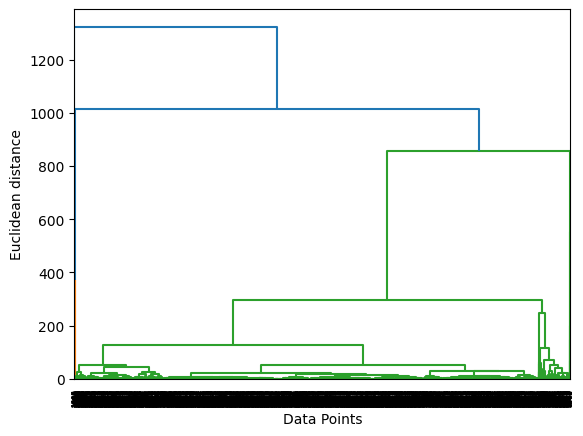

In [28]:
# Initializing hierarchical clustering and plotting a dendrogram.
merging = linkage(scaled_pca_df.drop(columns=['cluster']), method='ward')
dendrogram(merging, leaf_rotation=90)
plt.xlabel('Data Points')
plt.ylabel('Euclidean distance')
plt.show()

In [40]:
# Perform hierarchical clustering
Z = linkage(scaled_pca_df.drop(columns=['cluster']), method='ward')

# Cut the dendrogram to have exactly 4 clusters
clusters_hierarchical = fcluster(Z, 4, criterion='maxclust')

# clusters will contain the cluster labels (from 1 to 4) for each point in the dataset
print(clusters_hierarchical)

[2 2 2 ... 2 2 2]


In [41]:
# Creating a DataFrame for the prediction of hierarchical clustering.
with_hierarchical_df = pd.DataFrame(scaled_pca_df, columns=scaled_pca_df.columns, index=scaled_pca_df.index)
with_hierarchical_df['cluster'] = clusters_hierarchical
with_hierarchical_df.head()

,Principal Component 1,Principal Component 2,Principal Component 3,cluster
CustomerID,,,,
12346.0,-2.404391,-1.358245,-1.124678,2
12347.0,4.534020,4.773312,5.521025,2
12348.0,0.432336,-0.899576,-0.581015,2
12349.0,-0.266184,-0.597366,0.383031,2
12350.0,-1.918710,-0.589165,-0.547577,2


### DB Scan

In [83]:
# Initializing DB Scan.
dbscan = DBSCAN(eps=100, min_samples=10)

In [84]:
# Predicting the clusters with DB Scan.
cluster_dbscan = dbscan.fit_predict(scaled_pca)

In [85]:
# Viewing the predicted clusters.
cluster_dbscan

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
# Creating a DataFrame for the prediction of DB Scan.
with_dbscan_df = pd.DataFrame(scaled_pca_df, columns=scaled_pca_df.columns, index=scaled_pca_df.index)
with_dbscan_df['cluster'] = cluster_dbscan
with_dbscan_df.head()

,Principal Component 1,Principal Component 2,Principal Component 3,cluster
CustomerID,,,,
12346.0,-2.404391,-1.358245,-1.124678,0
12347.0,4.534020,4.773312,5.521025,0
12348.0,0.432336,-0.899576,-0.581015,0
12349.0,-0.266184,-0.597366,0.383031,0
12350.0,-1.918710,-0.589165,-0.547577,0


In [87]:
# Checking how many values each cluster has.
with_dbscan_df['cluster'].value_counts(ascending=True)

-1       7
 0    4365
Name: cluster, dtype: int64

## Visualize the transformed data-points in 3D.

*   Use cluster-labels to color the data-points.
*   There will be 3 plots each for a given algorithm.



In [45]:
fig = px.scatter_3d(with_km_df, x='Principal Component 1', y='Principal Component 2', z='Principal Component 3', color='cluster', title='K-Means')
fig.show()

In [44]:
fig = px.scatter_3d(with_hierarchical_df, x='Principal Component 1', y='Principal Component 2', z='Principal Component 3', color='cluster', title='Hierarchical')
fig.show()

In [88]:
fig = px.scatter_3d(with_dbscan_df, x='Principal Component 1', y='Principal Component 2', z='Principal Component 3', color='cluster', title='DB Scan')
fig.show()

For this experiment I believe K-Means performed the best as it has identified the most accurate clusters. Hierarchical comes second as it also performed pretty well, However, it got confused with the clusters close to each other in the middle of the plot. Whereas DB Scan performed the worst because it was only able to identify the clusters which were close in proximity.